<h1>Capstone Project — The Battle of Neighbourhoods</h1>

<h2>Introduction</h2>
Ahmedabad is located near the banks of the Sabarmati River, 25 km (16 mi), from the capital of Gujarat, Gandhinagar, also known as its twin city. Ahmedabad has emerged as an important economic and industrial hub in India.

And also Ahmedabad is very much famous for Food all over gujarat.

There are many restaurants in Ahmedabad City, each belonging to different categories like Chinese , Italian , North indian, French, etc.

So as part of this project , we will list and visualise all major parts of Ahmedabad, Gujarat.

<h2>Questions that can be asked using the above mentioned datasets</h2>

Q:which places are have best restaurant in Ahmedabad ?

Q:Which Restaurant have most outlets in Ahmedabad city ?

Q:Top Quick Bites restaurant in Ahmedabad?

Q:Top Casual Dining Restaurants in Ahmedabad?

Q:Which place are suitable for edible person in Ahmedabad city?

Q:What are the best chinese restaurant in Bodakdev?

Q:How many Restaurant Accepting Digital Payment in Ahmedabad?

<h2>Data</h2>
For this project we need the following data :

Ahmedabad Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.

Data source : Zomato Indian Restaurant kaggel dataset-><a href="https://www.kaggle.com/rabhar/zomato-restaurants-in-india">Dataset</a>

Description : This data set contains the required information. And we will use this data set to explore various locality of Ahmedabad city.
    
Nearby places in each locality of Ahmedabad city.

Data source : Foursquare API-><a href="https://developer.foursquare.com/">Foursquare</a>

Description : By using this api we will get all the venues in each neighborhood.

### Approach
- Collect the Ahmedabad city data from <a href="https://www.kaggle.com/rabhar/zomato-restaurants-in-india">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each restaurant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

<h2>Importing Required Libraries</h2>

In [207]:
import pandas as pd
import numpy as np
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!pip install folium 
import folium 
! pip install geocoder
import geocoder

You should consider upgrading via the 'c:\users\chandresh\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\chandresh\anaconda3\python.exe -m pip install --upgrade pip' command.


<h2>Overview of Dataset</h2>

In [208]:

df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [209]:
# we just need Ahmedabad city data
df_ahm = df[df['city'] == 'Ahmedabad']
df_ahm.reset_index(drop=True, inplace=True)
df_ahm.shape

(3162, 26)

In [210]:
df_ahm.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,18757684,Ph Se Food,['Casual Dining'],https://www.zomato.com/ahmedabad/ph-se-food-bo...,"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Ahmedabad,11,Bodakdev,23.038755,72.510887,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.5,Excellent,1434,773,0.0,-1,-1
1,18658177,Millhouse,['Casual Dining'],https://www.zomato.com/ahmedabad/millhouse-1-v...,"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad",Ahmedabad,11,"Ahmedabad One Mall, Vastrapur",23.039770,72.531508,...,3,Rs.,"['No Alcohol Available', 'Debit Card', 'Credit...",4.5,Excellent,1530,768,0.0,-1,-1
2,18663856,The Red Bistro,['Casual Dining'],https://www.zomato.com/ahmedabad/the-red-bistr...,"Armeida, Sindhu Bhavan Road, Off SG Road, Boda...",Ahmedabad,11,Bodakdev,23.039852,72.509181,...,3,Rs.,"['Lunch', 'Delivery', 'Debit Card', 'Dinner', ...",4.6,Excellent,695,631,0.0,-1,-1
3,18819827,Kadak Bhagat,['Casual Dining'],https://www.zomato.com/ahmedabad/kadak-bhagat-...,"1, First Floor, Dev Aurum Complex, Deer Cirle,...",Ahmedabad,11,Prahlad Nagar,23.012411,72.514392,...,3,Rs.,"['Credit Card', 'Dinner', 'Cash', 'Debit Card'...",4.4,Very Good,977,188,0.0,1,-1
4,18718880,Urban Khichdi,['Casual Dining'],https://www.zomato.com/ahmedabad/urban-khichdi...,"A -103, Shivalik Plaza, Opposite AMA, IIM Road...",Ahmedabad,11,Vastrapur,23.028315,72.542458,...,2,Rs.,"['Dinner', 'Delivery', 'Debit Card', 'Lunch', ...",4.7,Excellent,619,305,0.0,1,-1


In [211]:
#checking for redundant data in ahmedabad city dataset
df_ahm["res_id"].nunique()

1247

Here we can see that data redundancy available in our dataset<br>
Our next step will be to remove this data redundancy

In [212]:
df_ahm.drop_duplicates(["res_id"],keep='first',inplace=True)
df_ahm.shape

<ipython-input-212-db012989ba9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ahm.drop_duplicates(["res_id"],keep='first',inplace=True)


(1247, 26)

Here we can see Duplicate values are removed from dataset

In [330]:
df_ahm.set_index("res_id",inplace=True)

In [215]:
df_ahm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 18757684 to 18733569
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1247 non-null   object 
 1   establishment         1247 non-null   object 
 2   url                   1247 non-null   object 
 3   address               1247 non-null   object 
 4   city                  1247 non-null   object 
 5   city_id               1247 non-null   int64  
 6   locality              1247 non-null   object 
 7   latitude              1247 non-null   float64
 8   longitude             1247 non-null   float64
 9   zipcode               418 non-null    object 
 10  country_id            1247 non-null   int64  
 11  locality_verbose      1247 non-null   object 
 12  cuisines              1247 non-null   object 
 13  timings               1245 non-null   object 
 14  average_cost_for_two  1247 non-null   int64  
 15  price_rang

<h2>Exploratory Data Analysis</h2>

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Number of Restaurant in Ahmedabad')

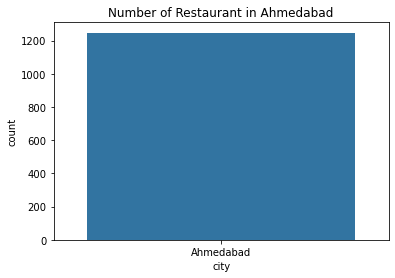

In [217]:
sns.countplot(x="city",data=df_ahm)
plt.title("Number of Restaurant in Ahmedabad")

<h2>which places are have best restaurant in Ahmedabad ?</h2>

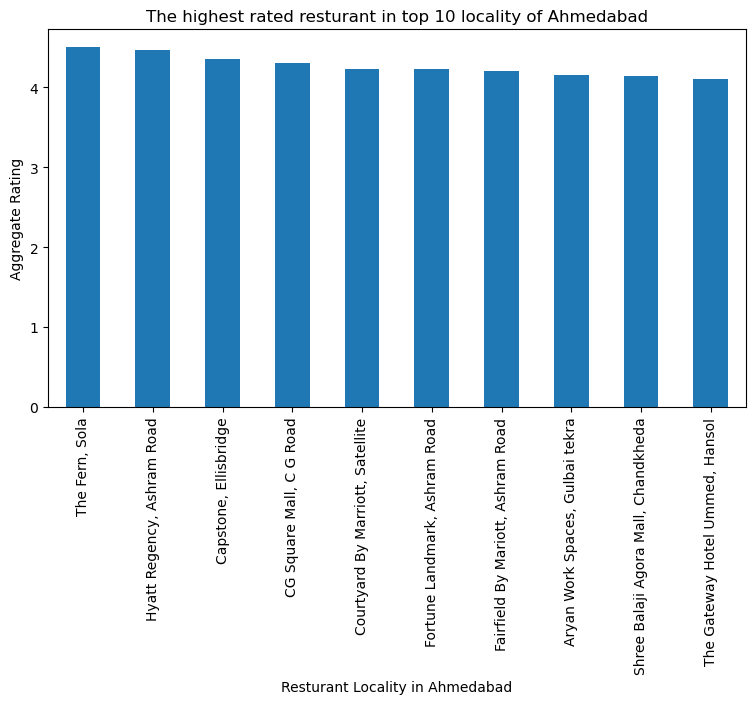

In [218]:
plt.figure(figsize=(9,5), dpi = 100)

plt.title('The highest rated resturant in top 10 locality of Ahmedabad')

df_ahm.groupby('locality')['aggregate_rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ahmedabad')

plt.ylabel('Aggregate Rating')

plt.show()

As you see Highest rated restaurant is <b>The Fern</b>.

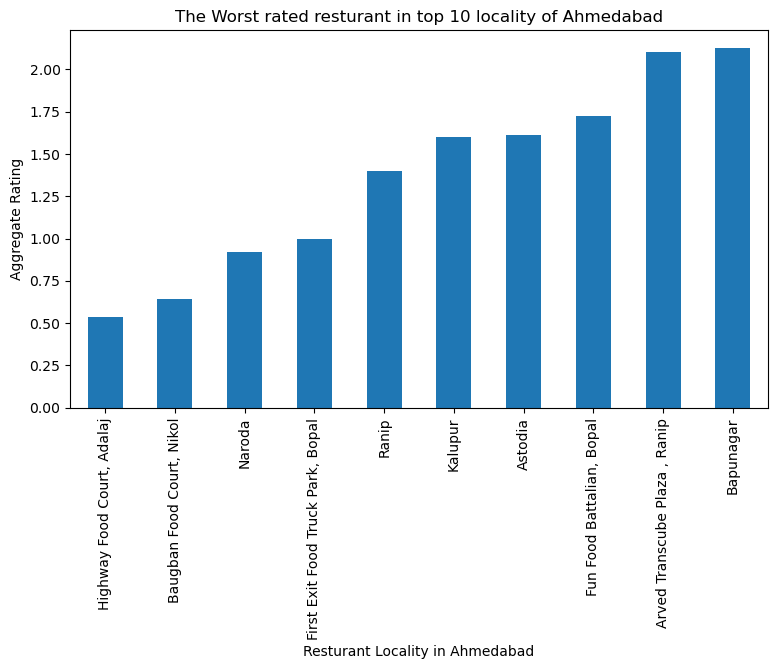

In [219]:
plt.figure(figsize=(9,5), dpi = 100)

plt.title('The Worst rated resturant in top 10 locality of Ahmedabad')

df_ahm.groupby('locality')['aggregate_rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ahmedabad')

plt.ylabel('Aggregate Rating')

plt.show()

As you see Worst rated restaurant is <b>Highway Food Court</b>.

<h2>Which Restaurant have most outlets in Ahmedabad city ?</h2>

Text(0.5, 1.0, 'Most outlets of Restaurants in Ahmedabad')

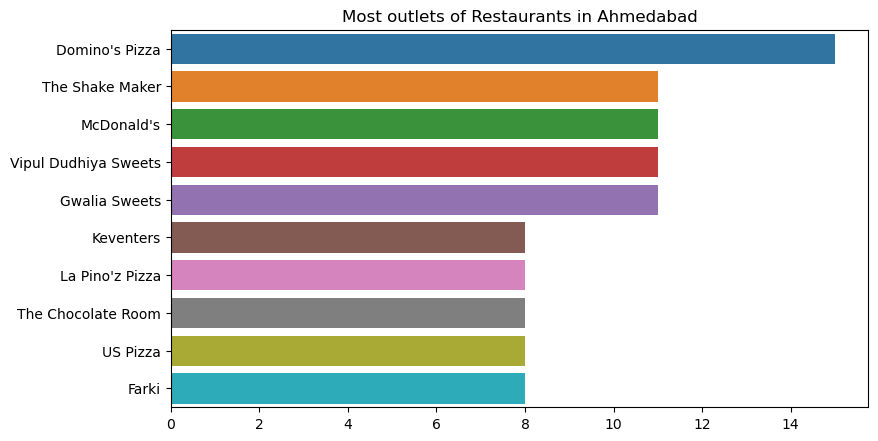

In [220]:
plt.figure(figsize=(9,5), dpi = 100)
sns.barplot(y=(df_ahm[df_ahm["city"]=="Ahmedabad"]["name"].value_counts()).index[:10],x=(df_ahm[df_ahm["city"]=="Ahmedabad"]["name"].value_counts()).values[:10])
plt.title("Most outlets of Restaurants in Ahmedabad")

<b>Domino's Pizza</b> have most outlets in Ahmedabad

<h2>Type of restaurant in ahmedabad</h2> 

Text(0.5, 1.0, 'Establishment Counts (Ahmedabad)')

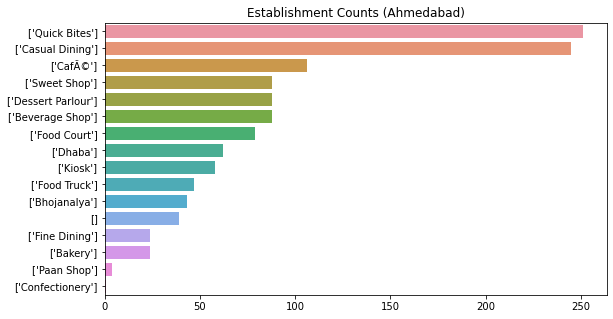

In [221]:
plt.figure(figsize=(9,5))
sns.barplot(y=df_ahm["establishment"].value_counts().index,x=df_ahm["establishment"].value_counts().values)
plt.title("Establishment Counts (Ahmedabad)")


250+ <b>Quick Bites</b> in ahmedabad

In [222]:
import collections

<h2>Top <u> Quick Bites</u> restaurant in Ahmedabad</h2>

In [223]:
def BestRestaurants(city,esta):
    data = city[city["establishment"]==esta]["name"].value_counts()[:10]
    ratings = {}
    #print(data.index.values)
    for name in data.index.values:
        ratings[name] = city[(city["establishment"]==esta) & (city["name"]==name)]["aggregate_rating"].mean()
    #print(ratings)
    sorted_ratings = sorted(ratings.items(),key=lambda x:x[1])[::-1]
    ratings = collections.OrderedDict(sorted_ratings)
    #print(ratings)
    plt.figure(figsize=(8,8))
    sns.barplot(y=[str(x) for x in ratings.keys()],x=[float(x) for x in ratings.values()])
    plt.title("Top 10 " + esta + " Restaurants in " + str(city["city"].values[0]))
    plt.xlabel("Average Ratings")
    plt.ylabel("Restaurant Names")

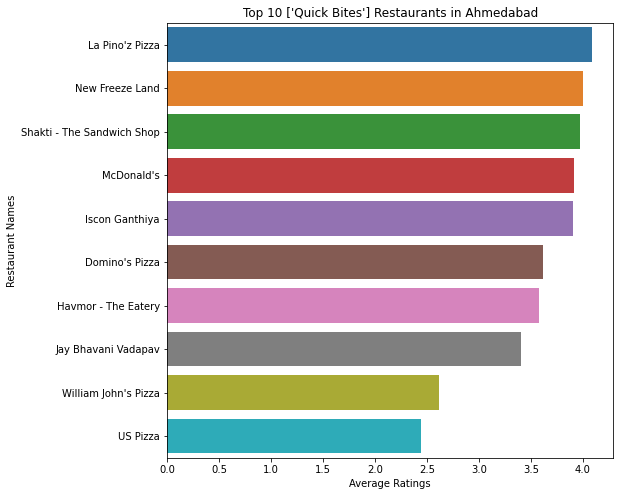

In [224]:
BestRestaurants(df_ahm,"['Quick Bites']")

<b>La Pino'z Pizza</b> is No.1 Quick bites restaurant

<h2>Top <u>Casual Dining</u> Restaurants in Ahmedabad</h2>

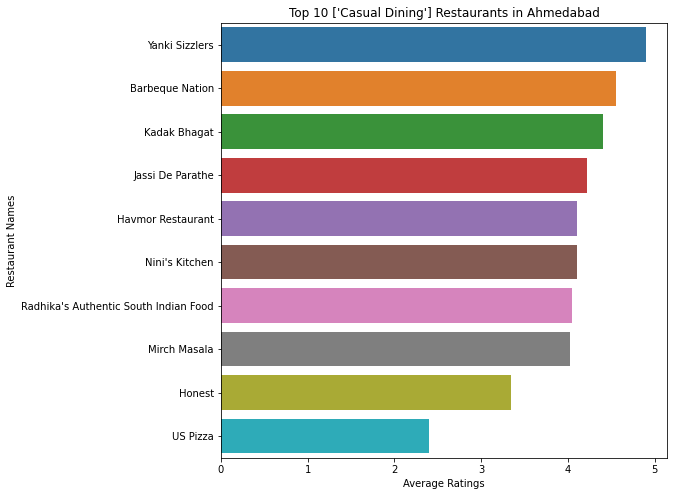

In [225]:
BestRestaurants(df_ahm,"['Casual Dining']")

<b>Yanki Sizzlers</b> is No.1 Casual Dining Restaurant

<h2>Which place are suitable for edible person in Ahmedabad city?</h2>

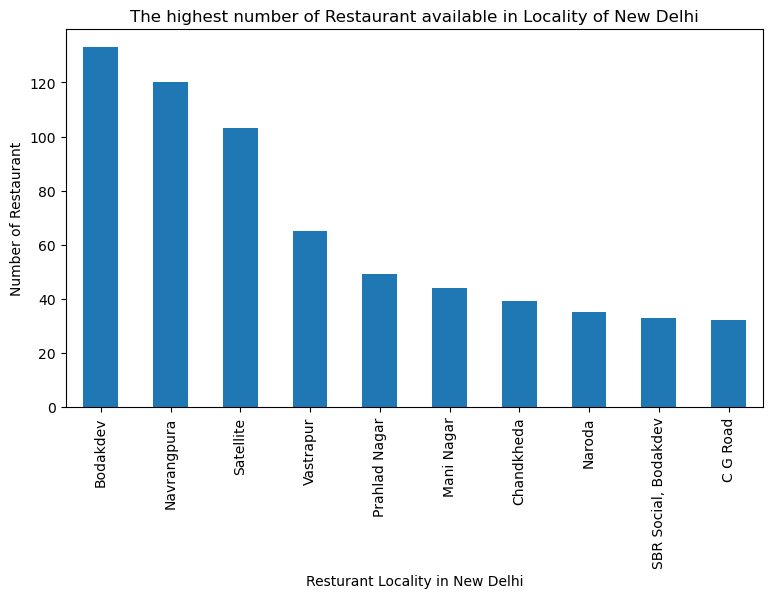

In [226]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_ahm.groupby('locality')['name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

In <b> Bodakdev</b> area Highest number of restaurant available so it's best suitable for <b>edible person</b>

<h2>What are the best chinese restaurant in Bodakdev?</h2>

In [227]:
from statistics import mean
def BestRestaurantsLocal(city,locality,cuisine):
    data = city[city["locality"]==locality]
    ratings = {}
    #print(data.index.values)
    for i in data.index.values:
        if cuisine in str(data.loc[i,"cuisines"]).split(', '):
            if data.loc[i,"name"] not in ratings:
                ratings[data.loc[i,"name"]] = [data.loc[i,"aggregate_rating"]]
            else:
                ratings[data.loc[i,"name"]].append(data.loc[i,"aggregate_rating"])
    for r in ratings.keys():
        ratings[str(r)] = mean(ratings[str(r)])
    sorted_ratings = sorted(ratings.items(),key=lambda x:x[1])[::-1]
    ratings = collections.OrderedDict(sorted_ratings)
    #print(ratings)
    plt.figure(figsize=(8,8))
    if len(ratings)>10:
        sns.barplot(y=[str(x) for x in ratings.keys()][:10],x=[float(x) for x in ratings.values()][:10])
        #plt.title("Top 10 " + cuisine + " Restaurants in " + locality)
        #plt.xlabel("Average Ratings")
        #plt.ylabel("Restaurant Names")
    else:
        sns.barplot(y=[str(x) for x in ratings.keys()],x=[float(x) for x in ratings.values()])
    plt.title("Top 10 " + cuisine + " Restaurants in " + locality)
    plt.xlabel("Average Ratings")
    plt.ylabel("Restaurant Names")

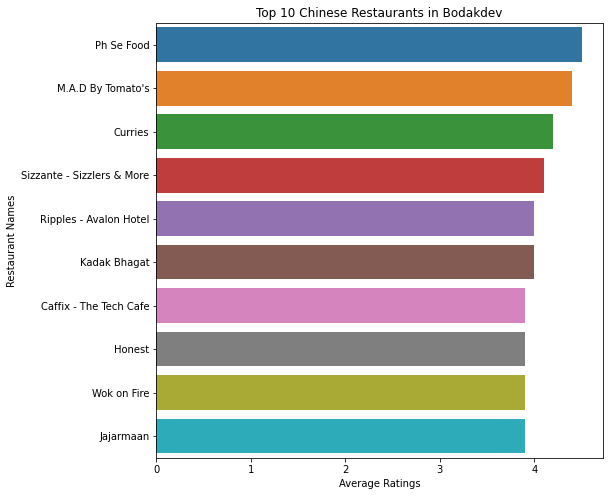

In [228]:
BestRestaurantsLocal(df_ahm,'Bodakdev','Chinese')

<b>Ph Se Food</b> is top rated Chinese restaurant in <b>bodakdev</b> area.

<h2>What are the best North Indian restaurant in Bodakdev?</h2>

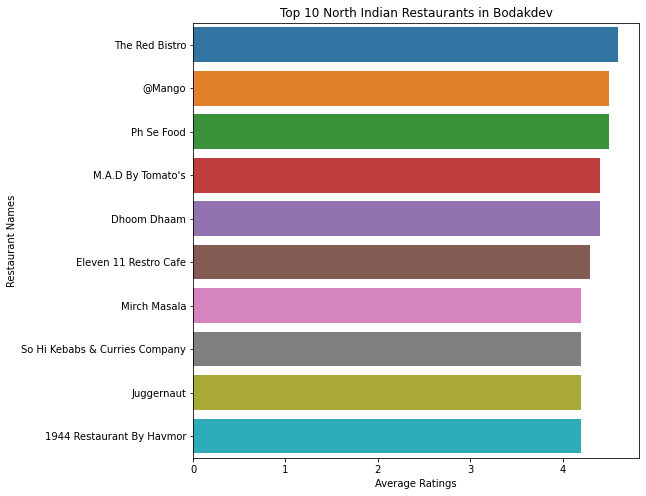

In [229]:
BestRestaurantsLocal(df_ahm,'Bodakdev','North Indian')

<b> The Red Bistro</b> is the Top rated North Indian Restaurant <b>Bodakdev</b> area.

<h2> How many Restaurant Accepting Digital Payment in Ahmedabad?</h2>

In [230]:
total_res = df_ahm.shape[0]
Digital_Payments = 0 

for highlights in df_ahm["highlights"]:
    if "'Digital Payments Accepted'" in str(highlights).split(', '):
        Digital_Payments +=1
    elif "'Credit Card'" in str(highlights).split(', '):
        Digital_Payments +=1
    elif "'Debit Card'" in str(highlights).split(', '):
        Digital_Payments +=1
    elif "'Sodexo'" in str(highlights).split(', '):
        Digital_Payments +=1

Text(0.5, 1.0, 'Digital Payment in Ahmedabad city restaurant')

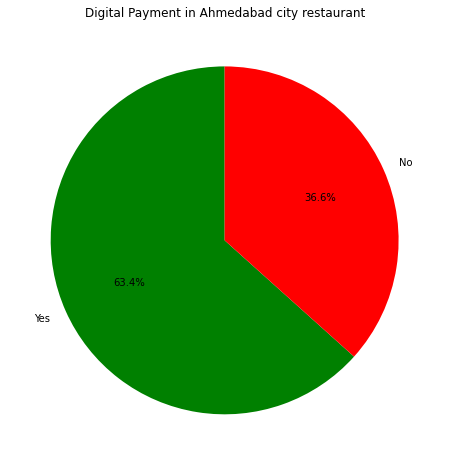

In [231]:
labels = ["Yes","No"]
sizes = [Digital_Payments,total_res-Digital_Payments]


plt.figure(figsize=(8,8))
plt.pie(sizes,labels=labels,startangle=90,autopct='%.1f%%',colors=["green","red"],wedgeprops={ 'linewidth' : 3 })
plt.title("Digital Payment in Ahmedabad city restaurant")

More than <b>60%</b> restaurant accepting <b>Digital Payment</b> in Ahmedabad city

In [248]:
df_Res_Loc =  df_ahm.groupby('locality').count()['name'].to_frame()
df_Res_rating= df_ahm.groupby('locality')['aggregate_rating'].mean().to_frame()
d_Cuisines = df_ahm.groupby(['locality'])['cuisines'].agg(', '.join).reset_index()
d_R = df_ahm.groupby(['locality'])['rating_text'].unique().agg(', '.join).reset_index()
d_V = df_ahm.groupby(['locality'])['votes'].sum().to_frame()
d_Lat = df_ahm.groupby('locality').mean()['latitude'].to_frame()
d_Lng = df_ahm.groupby('locality').mean()['longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='locality').merge(df_Res_Loc, on='locality').merge(d_Cuisines, on='locality').merge(df_Res_rating,on ='locality').merge(d_R, on ='locality').merge(d_V, on ='locality')

In [260]:
df_final = df_final[df_final['aggregate_rating'] != 0.000000]

In [435]:
LIMIT = 500 
CLIENT_ID = 'SGMGIBMFWGMDGMB5UAOGLFVDL5HXXIZ4H34DWLJ4ORPJMREN'
CLIENT_SECRET = 'PHJHXOGEB0XTUFAUFFCNMAJE1SQT2L3HAEP31JD41YYEA2GT'
VERSION = '20210729'

In [436]:
## create a function to repeat the same process to all the Locality in Ahmedabad

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [437]:


# find the venues in all Ahmedabad Locality
ahm_venues = getNearbyVenues(names=df_final['locality'],
                                   latitudes =df_final['latitude'],
                                   longitudes=df_final['longitude']
                                  )

In [438]:
ahm_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Sigma Legacy Building, Vastrapur",23.027206,72.544205,Mint Route,23.027645,72.544113,Vegetarian / Vegan Restaurant
1,"Sigma Legacy Building, Vastrapur",23.027206,72.544205,Birmies,23.027362,72.544465,Indian Restaurant
2,"Sigma Legacy Building, Vastrapur",23.027206,72.544205,Dangee Dums,23.027597,72.544235,Dessert Shop
3,"Sigma Legacy Building, Vastrapur",23.027206,72.544205,SandwichworkZ,23.028640,72.542761,Café
4,"Sigma Legacy Building, Vastrapur",23.027206,72.544205,Subway,23.028550,72.542598,Sandwich Place


In [265]:
ahm_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Sigma Legacy Building, Vastrapur",22,22,22,22,22,22
"10 Acres Mall, Kankaria",8,8,8,8,8,8
"4D Square Mall, Chandkheda",8,8,8,8,8,8
"Aarya Grand Hotels & Resorts, Sola",4,4,4,4,4,4
"Acropolis Mall, Thaltej",11,11,11,11,11,11
...,...,...,...,...,...,...
Vastrapur,23,23,23,23,23,23
Vatva,1,1,1,1,1,1
"Venus Atlantis, Prahlad Nagar",24,24,24,24,24,24


In [266]:
print('There are {} uniques categories.'.format(len(ahm_venues['Venue Category'].unique())))

There are 94 uniques categories.


In [267]:
## Analyze Each Locality

# one hot encoding
ahm_one_hot = pd.get_dummies(ahm_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
ahm_one_hot['Locality'] = ahm_venues['Locality'] 

# move Locality column to the first column
column_list = ahm_one_hot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
ahm_one_hot = ahm_one_hot[column_list]

ahm_one_hot.head()

,Locality,ATM,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bistro,Boat or Ferry,...,Street Food Gathering,Tea Room,Tennis Court,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Store,Yoga Studio,Zoo
0,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
ahmedabad_grouped = ahm_one_hot.groupby('Locality').mean().reset_index()
ahmedabad_grouped

,Locality,ATM,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bistro,Boat or Ferry,...,Street Food Gathering,Tea Room,Tennis Court,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Store,Yoga Studio,Zoo
0,"Sigma Legacy Building, Vastrapur",0.0,0.000,0.0,0.0,0.0,0.000000,0.136364,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.045455,0.0,0.000000,0.0
1,"10 Acres Mall, Kankaria",0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,"4D Square Mall, Chandkheda",0.0,0.125,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,"Aarya Grand Hotels & Resorts, Sola",0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,"Acropolis Mall, Thaltej",0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Vastrapur,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.043478,0.0,0.043478,0.0,0.000000,0.0
94,Vatva,1.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
95,"Venus Atlantis, Prahlad Nagar",0.0,0.000,0.0,0.0,0.0,0.083333,0.041667,0.0,0.0,...,0.0,0.041667,0.0,0.0,0.000000,0.0,0.083333,0.0,0.041667,0.0
96,"Vittal Mall, Chandkheda",0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.125000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [269]:
ahmedabad_grouped.shape

(98, 95)

<h2> Displaying Top 5 most comman venues<h2>

In [271]:

num_top_venues = 5

for venue in ahmedabad_grouped['Locality']:
    print(venue)
    temp = ahmedabad_grouped[ahmedabad_grouped['Locality'] == venue].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

 Sigma Legacy Building, Vastrapur
               venue  freq
0               Café  0.23
1  Indian Restaurant  0.18
2             Bakery  0.14
3       Dessert Shop  0.09
4     Breakfast Spot  0.05


10 Acres Mall, Kankaria
                  venue  freq
0         Shopping Mall  0.25
1             Multiplex  0.25
2           Pizza Place  0.12
3           Bus Station  0.12
4  Fast Food Restaurant  0.12


4D Square Mall, Chandkheda
            venue  freq
0     Pizza Place  0.25
1          Arcade  0.12
2      Restaurant  0.12
3     Coffee Shop  0.12
4  Sandwich Place  0.12


Aarya Grand Hotels & Resorts, Sola
         venue  freq
0        Hotel  0.25
1   Restaurant  0.25
2  Coffee Shop  0.25
3  Snack Place  0.25
4          ATM  0.00


Acropolis Mall, Thaltej
               venue  freq
0  Indian Restaurant  0.27
1               Café  0.09
2              Plaza  0.09
3     Ice Cream Shop  0.09
4     Sandwich Place  0.09


Ahmedabad Central Mall, Ambavadi
                  venue  freq
0  Fast F

In [273]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [274]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = ahmedabad_grouped['Locality']

for ind in np.arange(ahmedabad_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ahmedabad_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Sigma Legacy Building, Vastrapur",Café,Indian Restaurant,Bakery,Dessert Shop,Vegetarian / Vegan Restaurant,Pizza Place,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,Breakfast Spot
1,"10 Acres Mall, Kankaria",Multiplex,Shopping Mall,Pizza Place,Clothing Store,Fast Food Restaurant,Bus Station,Flea Market,Diner,Donut Shop,Electronics Store
2,"4D Square Mall, Chandkheda",Pizza Place,Arcade,North Indian Restaurant,Coffee Shop,Multiplex,Restaurant,Sandwich Place,Fast Food Restaurant,Diner,Donut Shop
3,"Aarya Grand Hotels & Resorts, Sola",Snack Place,Hotel,Coffee Shop,Restaurant,Dance Studio,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
4,"Acropolis Mall, Thaltej",Indian Restaurant,Mediterranean Restaurant,Shopping Mall,Multiplex,Coffee Shop,Ice Cream Shop,Plaza,Sandwich Place,Café,Donut Shop
...,...,...,...,...,...,...,...,...,...,...,...
93,Vastrapur,Shopping Mall,Clothing Store,Pizza Place,Fast Food Restaurant,Indian Restaurant,Multiplex,Donut Shop,Men's Store,Café,Restaurant
94,Vatva,ATM,Food Truck,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food & Drink Shop
95,"Venus Atlantis, Prahlad Nagar",Indian Restaurant,Restaurant,Café,Vegetarian / Vegan Restaurant,BBQ Joint,Gym,Fast Food Restaurant,Diner,Coffee Shop,Pizza Place
96,"Vittal Mall, Chandkheda",Pizza Place,North Indian Restaurant,Coffee Shop,Multiplex,Tea Room,Restaurant,Sandwich Place,Fast Food Restaurant,Dessert Shop,Diner


In [421]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 4

ahmedabad_cluster = ahmedabad_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ahmedabad_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(98,)

In [422]:
# add clustering labels
ahmedabad_merged = df_final.head(98)
ahmedabad_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
ahmedabad_merged = ahmedabad_merged.join(Locality_venues_sorted.set_index('Locality'), on='locality')
ahmedabad_merged.head()

<ipython-input-422-cfb5dbda6e97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahmedabad_merged['Cluster Labels'] = kmeans.labels_


,locality,latitude,longitude,name,cuisines,aggregate_rating,rating_text,votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Sigma Legacy Building, Vastrapur",23.027206,72.544205,4,"North Indian, BBQ, Desserts, Bakery, Desserts,...",3.950000,"Good, Very Good",1935,0,Café,Indian Restaurant,Bakery,Dessert Shop,Vegetarian / Vegan Restaurant,Pizza Place,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,Breakfast Spot
1,"10 Acres Mall, Kankaria",23.014879,72.596397,2,"Beverages, Cafe, Sandwich, Fast Food, Burger, ...",3.150000,"Average, Good",432,1,Multiplex,Shopping Mall,Pizza Place,Clothing Store,Fast Food Restaurant,Bus Station,Flea Market,Diner,Donut Shop,Electronics Store
2,"4D Square Mall, Chandkheda",23.102904,72.595628,15,"Pizza, Fast Food, Pizza, Fast Food, North Indi...",3.686667,"Average, Good, Very Good",7615,1,Pizza Place,Arcade,North Indian Restaurant,Coffee Shop,Multiplex,Restaurant,Sandwich Place,Fast Food Restaurant,Diner,Donut Shop
3,"Aarya Grand Hotels & Resorts, Sola",23.075432,72.522667,3,"North Indian, Cafe, Cafe",4.033333,"Good, Very Good",412,1,Snack Place,Hotel,Coffee Shop,Restaurant,Dance Studio,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
4,"Acropolis Mall, Thaltej",23.048580,72.516060,5,"North Indian, Mughlai, Continental, Desserts, ...",3.820000,"Good, Very Good, Poor",1103,0,Indian Restaurant,Mediterranean Restaurant,Shopping Mall,Multiplex,Coffee Shop,Ice Cream Shop,Plaza,Sandwich Place,Café,Donut Shop


In [423]:
def addToMap(df, color, existingMap):
    markers_colors = []
    for lat, lon, poi, cluster in zip(ahmedabad_merged['latitude'], ahmedabad_merged['longitude'], ahmedabad_merged['locality'], ahmedabad_merged['Cluster Labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='black',
            fill=True,
            fill_color=colors[cluster],
            fill_opacity=0.7).add_to(map_newyork_sushi)

In [424]:
# create final map


for lat, log in zip(latitude, longitude): 
    map_newyork_sushi = folium.Map(location=[lat, log], zoom_start=10)
    addToMap(ahmedabad_merged, 'red', map_newyork_sushi)
       
map_newyork_sushi

In [425]:
## Examine Clusters

## Cluster 1
df_cluster_1 = ahmedabad_merged.loc[ahmedabad_merged['Cluster Labels'] == 0, ahmedabad_merged.columns[[1] + list(range(5, ahmedabad_merged.shape[1]))]]
df_cluster_1

,latitude,aggregate_rating,rating_text,votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,23.027206,3.950000,"Good, Very Good",1935,0,Café,Indian Restaurant,Bakery,Dessert Shop,Vegetarian / Vegan Restaurant,Pizza Place,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,Breakfast Spot
4,23.048580,3.820000,"Good, Very Good, Poor",1103,0,Indian Restaurant,Mediterranean Restaurant,Shopping Mall,Multiplex,Coffee Shop,Ice Cream Shop,Plaza,Sandwich Place,Café,Donut Shop
10,22.991732,3.200000,Average,13,0,Café,Zoo,Dance Studio,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market
12,23.068143,2.100000,"Good, Average, Not rated",218,0,Indie Movie Theater,Multiplex,Bus Station,Zoo,Food Court,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
16,23.038788,2.125000,"Not rated, Good, Average",195,0,Ice Cream Shop,Smoke Shop,Zoo,Food Court,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
20,23.020604,3.267347,"Very Good, Average, Not rated, Good, Ä°yi",17786,0,Outlet Mall,Restaurant,Zoo,Dance Studio,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
21,23.029633,4.275000,"Very Good, Excellent, Good, Average, Muito Bom...",93747,0,Café,Fast Food Restaurant,Indian Restaurant,Clothing Store,Mexican Restaurant,Park,Arts & Crafts Store,Pizza Place,Sandwich Place,Coffee Shop
24,23.011711,3.836364,"Good, Very Good",5592,0,Indian Restaurant,Restaurant,BBQ Joint,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Bakery,Café,Coffee Shop,Sandwich Place,Hotel
27,23.089656,2.233333,"Good, Not rated, Average",48,0,ATM,Indian Restaurant,Coffee Shop,Sandwich Place,Pharmacy,Flea Market,Dessert Shop,Diner,Donut Shop,Electronics Store
29,23.027673,4.174074,"Very Good, Excellent",24769,0,Multiplex,Coffee Shop,Indian Restaurant,Shopping Mall,Hotel,Italian Restaurant,Electronics Store,Pizza Place,Chinese Restaurant,Café


In [426]:
from pandas import *
df_dupli = pivot_table(df_cluster_1, index = ['1st Most Common Venue'], aggfunc ='size')
df_dupli

1st Most Common Venue
ATM                     2
Brewery                 1
Café                    6
Coffee Shop             1
Cricket Ground          1
Dessert Shop            1
Fast Food Restaurant    2
Gas Station             1
Gujarati Restaurant     1
Hotel                   3
Hotel Bar               1
Ice Cream Shop          1
Indian Restaurant       5
Indie Movie Theater     1
Multiplex               3
Outlet Mall             1
Pizza Place             2
Zoo                     1
dtype: int64

In [427]:
## Examine Clusters

## Cluster 2
df_cluster_2 = ahmedabad_merged.loc[ahmedabad_merged['Cluster Labels'] == 1, ahmedabad_merged.columns[[1] + list(range(5, ahmedabad_merged.shape[1]))]]
df_cluster_2

,latitude,aggregate_rating,rating_text,votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,23.014879,3.150000,"Average, Good",432,1,Multiplex,Shopping Mall,Pizza Place,Clothing Store,Fast Food Restaurant,Bus Station,Flea Market,Diner,Donut Shop,Electronics Store
2,23.102904,3.686667,"Average, Good, Very Good",7615,1,Pizza Place,Arcade,North Indian Restaurant,Coffee Shop,Multiplex,Restaurant,Sandwich Place,Fast Food Restaurant,Diner,Donut Shop
3,23.075432,4.033333,"Good, Very Good",412,1,Snack Place,Hotel,Coffee Shop,Restaurant,Dance Studio,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
5,23.151667,2.343750,"Good, Poor, Average, Not rated, Very Good",1231,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23.020817,3.300000,"Average, Very Good",127,1,Fast Food Restaurant,Shopping Mall,Café,Pizza Place,Indian Restaurant,Park,Hotel,Ice Cream Shop,Movie Theater,Coffee Shop
7,23.039818,3.960000,"Excellent, Average, Good, Very Good, Not rated",29957,1,Shopping Mall,Clothing Store,Pizza Place,Fast Food Restaurant,Café,Bakery,Food Court,Donut Shop,Men's Store,Restaurant
8,22.998622,3.500000,"Average, Good",65,1,Tea Room,Garden,Lounge,Café,Bus Station,Zoo,Food Court,Donut Shop,Electronics Store,Falafel Restaurant
11,23.037529,3.733333,Good,785,1,Indian Restaurant,Cricket Ground,Café,Ice Cream Shop,Dessert Shop,Cosmetics Shop,Shoe Store,Hotel,Bistro,Electronics Store
13,23.033318,4.152381,"Very Good, Muito Bom",15140,1,Indian Restaurant,Café,Pizza Place,Coffee Shop,Clothing Store,Tea Room,Snack Place,Arcade,Gourmet Shop,Gujarati Restaurant
14,23.032384,3.777500,"Very Good, Good, Average, Not rated",30732,1,Train Station,Multiplex,Shoe Store,Fast Food Restaurant,Zoo,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store


In [428]:
df_dupli_1 = pivot_table(df_cluster_2, index = ['1st Most Common Venue'], aggfunc ='size')
df_dupli_1

1st Most Common Venue
ATM                       2
Asian Restaurant          1
Bus Station               1
Café                      2
Fast Food Restaurant      4
Food Court                1
Food Truck                1
Gym                       1
History Museum            1
Hotel                     4
Hotel Bar                 1
IT Services               1
Ice Cream Shop            1
Indian Restaurant        14
Multiplex                 2
Performing Arts Venue     1
Pharmacy                  1
Pizza Place               5
Restaurant                1
Sandwich Place            1
Shopping Mall             1
Snack Place               2
Tea Room                  1
Train Station             1
dtype: int64

In [429]:
## Examine Clusters

## Cluster 3
df_cluster_3 = ahmedabad_merged.loc[ahmedabad_merged['Cluster Labels'] == 2, ahmedabad_merged.columns[[1] + list(range(5, ahmedabad_merged.shape[1]))]]
df_cluster_3

,latitude,aggregate_rating,rating_text,votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,23.077368,1.548889,"Good, Poor, Average, Not rated",2166,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,23.047659,3.205556,"Good, Average, Not rated",4214,2,Pizza Place,Smoke Shop,Cricket Ground,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
94,23.042460,4.157143,Very Good,12960,2,Coffee Shop,Indian Restaurant,Café,Hotel,Vegetarian / Vegan Restaurant,Donut Shop,Pizza Place,Ice Cream Shop,Mexican Restaurant,Dessert Shop


In [430]:
df_dupli_2 = pivot_table(df_cluster_3, index = ['1st Most Common Venue'], aggfunc ='size')
df_dupli_2

1st Most Common Venue
Coffee Shop    1
Pizza Place    1
dtype: int64

In [431]:
## Examine Clusters

## Cluster 4
df_cluster_4 = ahmedabad_merged.loc[ahmedabad_merged['Cluster Labels'] ==3 , ahmedabad_merged.columns[[1] + list(range(5, ahmedabad_merged.shape[1]))]]
df_cluster_4

,latitude,aggregate_rating,rating_text,votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,23.018053,3.884,"Very Good, Good, Average, Not rated",17206,3,Food Truck,ATM,Fast Food Restaurant,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Flea Market,Food & Drink Shop
31,23.028029,3.900,Good,130,3,Hotel,Noodle House,Bookstore,Food Court,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant


In [432]:
df_dupli_3 = pivot_table(df_cluster_4, index = ['1st Most Common Venue'], aggfunc ='size')
df_dupli_3

1st Most Common Venue
Food Truck    1
Hotel         1
dtype: int64

<h2>Conclusion</h2>
Answer to our questions:<br><br>
Q:which places are have best restaurant in Ahmedabad ?<br>
A:Sola, Ashram road, Ellisbridge, C G Road, stellite, Gulbai tekra and Hansoi are the best places which have <b>4+</b> ratings restaurant. <br><br>
Q:Which Restaurant have most outlets in Ahmedabad city ?<br>
A:Domino's Pizza have most outlets in ahmedabad<br><br>
Q:Top Quick Bites restaurant in Ahmedabad?<br>
A:La Pinoz Pizza is no. 1 Quick bite restaurant in ahmedabad<br><br>
Q:Top Casual Dining Restaurants in Ahmedabad?<br>
A:Yanki Sizzlers,Barbeque Nation etc. are the best Dining Restaurant in Ahmedabad<br><br>
Q:Which place are suitable for edible person in Ahmedabad city?<br>
A:Bodakdev and Navrangpura are the best place for edible person<br><br>
Q:What are the best chinese restaurant in Bodakdev?<br>
A:Ph Se Food is the best Chinese Restaurant in Bodakdev<br><br>
Q:How many Restaurant Accepting Digital Payment in Ahmedabad?<br>
A:63.4% restaurant are accepting digital payment but 36.6% are not accepting Digital payment<br><br>

<h3>Cluster 1:</h3>
It is most recommended for Cafe.
    
<h3>Cluster 2:</h3>
It is most recommended for Indian Restaurant.
    
<h3>Cluster 3:</h3>
It is most recommended for Coffee Shope and Pizza place.

<h3>Cluster 4:</h3>
It is most recommended for Food Truck and hotel.